In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.simulate import *

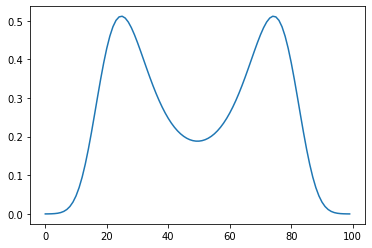

In [40]:
n_steps = 100
x = np.linspace(-2, 2, n_steps)
pgt = gt(x)
plt.plot(pgt / (4 / n_steps))

In [41]:
from src.hmc import * 
n_samples = 10000
samples = []
xt = 0
M = 1
eps=0.1
L=50
correction=True

for _ in range(n_samples):
    xt = naive_hmc(function, grad, M, eps, L, xt, correction)
    samples.append(xt)
samples = np.array(samples)

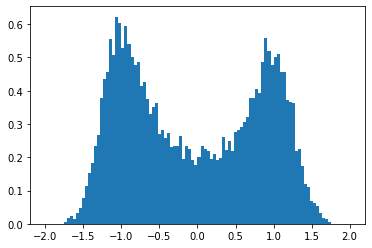

In [42]:
(bins, vals, density) = plt.hist(samples, bins=100, range=(-2, 2), density=True)

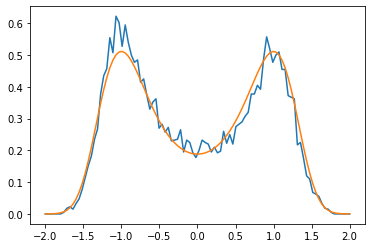

In [43]:
plt.plot(x, bins)
plt.plot(x, pgt / (4 / n_steps))

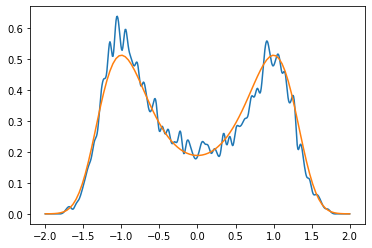

In [44]:
from scipy.interpolate import make_interp_spline
X_Y_Spline = make_interp_spline(x, bins)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.plot(x, pgt / (4 / n_steps))

# SGHMC

In [54]:
from src.hmc import *
V = 4
B = 0.5 * V * eps; 
C = 2

sghmc_samples = []
for _ in range(n_samples):
    xt = sghmc(function, grad_hat, M, eps, L, xt, C, B)
    sghmc_samples.append(xt)
sghmc_samples = np.array(sghmc_samples)

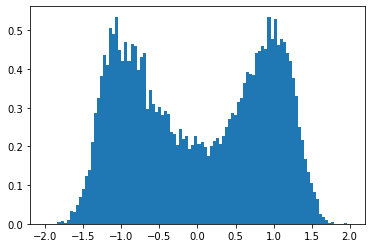

In [55]:
(bins, vals, density) = plt.hist(sghmc_samples, bins=100, range=(-2, 2), density=True)

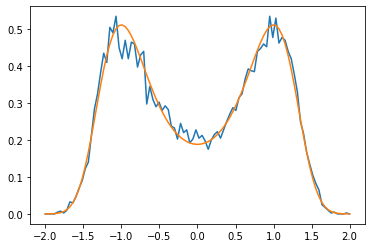

In [56]:
plt.plot(x, bins)
plt.plot(x, pgt / (4 / n_steps))

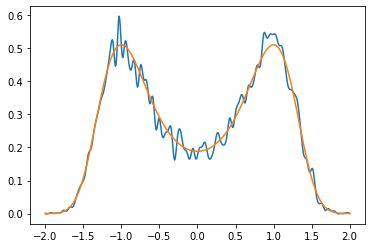

In [50]:
X_Y_Spline = make_interp_spline(x, bins)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.plot(x, pgt / (4 / n_steps))